# 1) Get Data

In [41]:
#RUNPCA 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.feature_selection import VarianceThreshold
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 60)

# Matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Imputing missing values and scaling values
from sklearn.preprocessing import Imputer, MinMaxScaler

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [42]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 40)

In [59]:
df = pd.read_csv("./dataframe.csv")
df.head() # shape = (278220, 35)


,Unnamed: 0,Year,Month,Day,hour,pressure,humidity,temperature,wind_direction,wind_speed,description,Origin,Flights,Dest,DepTime,DepDelay,DepDelayMinutes,DepDel15,CRSDepTime,Distance,DepartureDelayGroups,TaxiOut,TaxiIn,ArrTime,ArrDelay,Cancelled,Diverted,AirTime,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,CancellationCode,FlightNum,SchedDepartTime
0,0,2015.0,1.0,1.0,5,1043.0,80.0,273.207333,317.0,1.0,few clouds,ATL,1.0,IAD,556.0,16.0,16.0,1.0,540,534.0,1.0,9.0,15.0,739.0,14.0,0.0,0.0,79.0,0.0,0.0,0.0,0.0,0.0,0,EV3268,540.0
1,1,2015.0,1.0,1.0,6,1043.0,80.0,272.990000,329.0,1.0,sky is clear,ATL,1.0,MIA,656.0,-4.0,0.0,0.0,700,594.0,-1.0,15.0,9.0,842.0,-10.0,0.0,0.0,82.0,0.0,0.0,0.0,0.0,0.0,0,AA17,660.0
2,2,2015.0,1.0,1.0,6,1043.0,80.0,272.990000,329.0,1.0,sky is clear,ATL,1.0,LGA,644.0,-1.0,0.0,0.0,645,762.0,-1.0,31.0,9.0,901.0,8.0,0.0,0.0,97.0,0.0,0.0,0.0,0.0,0.0,0,DL886,645.0
3,3,2015.0,1.0,1.0,6,1043.0,80.0,272.990000,329.0,1.0,sky is clear,ATL,1.0,MCO,654.0,-1.0,0.0,0.0,655,404.0,-1.0,14.0,8.0,815.0,-7.0,0.0,0.0,59.0,0.0,0.0,0.0,0.0,0.0,0,DL1818,655.0
4,4,2015.0,1.0,1.0,6,1043.0,80.0,272.990000,329.0,1.0,sky is clear,ATL,1.0,CLT,658.0,-2.0,0.0,0.0,700,226.0,-1.0,15.0,10.0,801.0,-11.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,0.0,0,US461,660.0


In [60]:
df=df[['DepDelay','hour', 'pressure', 'humidity', 'temperature', 'wind_speed', 'description', 'Origin', 'Dest', 'DepTime', 'Distance', 'ArrTime','AirTime']]
X=df[['hour', 'pressure', 'humidity', 'temperature', 'wind_speed', 'description', 'Origin', 'Dest', 'DepTime', 'Distance', 'ArrTime','AirTime']]
y = df['DepDelay']
# 'DepTime' 'ArrTime' 'AirTime']

In [61]:
X.shape
y.shape

(278220,)

In [62]:
# features.shape
test1234=df

In [63]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
#     y = df['DepDelay']
    # Dont want to remove correlations between Energy Star Score
    y = df['DepDelay']
    x = df.drop(columns = ['DepDelay'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = df.drop(columns = drops)
#     x = df.drop(columns = ['hour', 'pressure', 'humidity', 'temperature', 'wind_speed',
#        'description', 'Origin', 'Dest', 'DepTime', 'Distance', 'ArrTime',
#        'AirTime'])
    
    # Add the score back in to the data
    x['DepDelay'] = y
               
    return x

In [64]:
features123 = remove_collinear_features(df, 0.6);

In [65]:
# features123.columns
# len(features123.columns)
# features=[ 'DepDelay', 'hour', 'pressure', 'humidity', 'temperature', 'wind_speed',
#        'description', 'Origin', 'Dest', 'Distance']

In [66]:
categorical_subset = features123[['Origin','Dest','description']]
numeric_subset=features123[['hour', 'pressure', 'humidity', 'temperature', 'wind_speed', 'Distance']]
# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features1234 = pd.concat([numeric_subset, categorical_subset], axis = 1)

In [67]:
# features1234.head()

In [ ]:

features = features1234 #(278220, 13)
targets = y #pd.DataFrame(y)  #278220,)


In [ ]:
### changed to calculate just with depdelay
###Convert y to set of classes
y_ontime = y[(y <= 15) & (y >= 0)] # 0 <= y <= 15 is on time by FAA standards
y_early = y[y < 0] # y < 0 is flight left early
y_delay = y[(y > 15) & (y <= 60)] # 15 < y <= 60 we'll consider as delayed
y_sig_delay = (y[y > 60]) # 60 < y we'll considered significantly delayed

y_early = ["y_early"]*len(y_early)
y_ontime = ['y_ontime']*len(y_ontime)
y_delay = ['y_delay']*len(y_delay)
y_sig_delay = ['y_sig_delay']*len(y_sig_delay)
y = pd.DataFrame(y_early + y_ontime + y_delay + y_sig_delay)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)
# y = column(y, warn=True)
y_new = le.transform(y)
y_new.shape #(278220,)
y_new
targets=y_new

In [ ]:
# Split into 70% training and 30% testing set
X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)


In [40]:
# targets
# y_test.shape
# X.shape #(194754, 284)
# X_test.shape #(83466, 284))
# y.shape
# X.head()

# X.head()
X
# features_names
# X.head()

array([[0.73913043, 0.72727273, 0.94623656, ..., 0.        , 0.        ,
        0.        ],
       [0.86956522, 0.56198347, 0.1827957 , ..., 0.        , 0.        ,
        0.        ],
       [0.65217391, 0.50413223, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.65217391, 0.76859504, 0.89247312, ..., 0.        , 0.        ,
        0.        ],
       [0.26086957, 0.67768595, 0.69892473, ..., 0.        , 0.        ,
        0.        ],
       [0.30434783, 0.80991736, 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit on the training data
scaler.fit(X)

# Transform both the training and testing data
X = scaler.transform(X)
X_test = scaler.transform(X_test)
# y = scaler.transform(y)
# y_test = scaler.transform(y_test)
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [ ]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X, y)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)
    
    # Return the performance metric
    return model_mae

In [ ]:
lr = LinearRegression()
lr_mae = fit_and_evaluate(lr)

print('Linear Regression Performance on the test set: MAE = %0.4f' % lr_mae)
#$Linear Regression Performance on the test set: MAE = 18.8622
# Linear Regression Performance on the test set: MAE = 0.4349
# print(lr_mae.classes_)


In [ ]:
lr.get_params
lr.get_params
feature_names = np.asarray(lr.get_params)
# feature_names
# reg.intercept_
# # densify(reg.coef_)
# reg.get_params
# # reg.get_feature_names()
# coef = reg.coef_.ravel()
# coef.

# top_positive_coefficients = np.argsort(coef)[-20:]
# top_negative_coefficients = np.argsort(coef)[:20]
# feature_names = np.array(feature_names)
# print(feature_names(top_positive_coefficients))

In [ ]:
# ***
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn import datasets
from sklearn.svm import l1_min_c
cs = l1_min_c(X, y, loss='log') * np.logspace(0, 7, 16)


print("Computing regularization path ...")
start = time()
clf = linear_model.LogisticRegression(penalty='l1', solver='saga',
                                      tol=1e-6, max_iter=int(1e6),
                                      warm_start=True)
coefs_ = []
for c in cs:
    clf.set_params(C=c)
    clf.fit(X, y)
    coefs_.append(clf.coef_.ravel().copy())
print("This took %0.3fs" % (time() - start))

coefs_ = np.array(coefs_)
plt.plot(np.log10(cs), coefs_, marker='o')
ymin, ymax = plt.ylim()
plt.xlabel('log(C)')
plt.ylabel('Coefficients')
plt.title('Logistic Regression Path')
plt.axis('tight')
plt.show()

In [ ]:
predictions = reg.predict(X)

print('accuracy (simple):', accuracy_score(y_test, predictions))
# tfidf.get_feature_names()


# from sklearn.linear_model import Ridge
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.pipeline import make_pipeline

# poly = PolynomialFeatures(2)

# poly.fit_transform(X)



# poly = PolynomialFeatures(interaction_only=True)
# poly.fit_transform(X)
# poly.



# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.svm import LinearSVC
# import matplotlib.pyplot as plt
# def plot_coefficients(classifier, feature_names, top_features=20):
#     coef = classifier.coef_.ravel()
#     top_positive_coefficients = np.argsort(coef)[-top_features:]
#     top_negative_coefficients = np.argsort(coef)[:top_features]
#     top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
#     # create plot
#     plt.figure(figsize=(15, 5))
#     colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
#     plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
#     feature_names = np.array(feature_names)
#     plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
#     plt.show()
# cv = CountVectorizer()
# cv.fit(features)
# print (len(cv.vocabulary_))
# print (cv.get_feature_names())
# X_train = cv.transform(features)

# svm = LinearSVC()
# svm.fit(X, y)
# plot_coefficients(svm, cv.get_feature_names())
# # feature_names = np.asarray(feature_names)
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.svm import LinearSVC
# import matplotlib.pyplot as plt
# cv = CountVectorizer()
# cv.fit(features)
# # print (len(cv.vocabulary_))
# print (cv.get_feature_names())
# cv.

In [ ]:
# svm = SVR(C = 1000, gamma = 0.1)
# svm_mae = fit_and_evaluate(svm)

# print('Support Vector Machine Regression Performance on the test set: MAE = %0.4f' % svm_mae)

# Randomforest Run

In [19]:
random_forest = RandomForestRegressor(random_state=60)
random_forest_mae = fit_and_evaluate(random_forest)

print('Random Forest Regression Performance on the test set: MAE = %0.4f' % random_forest_mae)
# Random Forest Regression Performance on the test set: MAE = 0.0023
# random_forest_mae.feature_importances_


/Users/powersky/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Regression Performance on the test set: MAE = 0.0023


In [77]:
random_forest.score

<bound method RegressorMixin.score of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=60, verbose=0, warm_start=False)>

In [49]:
#view the features and their importances
rf=random_forest
features_names=X.columns
for feature in zip(features_names, rf.feature_importances_):
    print(feature)
# ('hour', 0.03911589830100198)
# ('pressure', 0.20277578146974445)
# ('humidity', 0.08590977227423212)
# ('temperature', 0.1627232799903858)
# ('wind_speed', 0.0322263620926306)
# ('description', 0.00036040752826687315)
# ('Origin', 0.03747655255722365)
# ('Dest', 0.01798595812931924)
# ('DepTime', 0.10238765402864572)
# ('Distance', 0.018619636653529014)
# ('ArrTime', 0.16069123648273992)

('hour', 0.03911589830100198)
('pressure', 0.20277578146974445)
('humidity', 0.08590977227423212)
('temperature', 0.1627232799903858)
('wind_speed', 0.0322263620926306)
('description', 0.00036040752826687315)
('Origin', 0.03747655255722365)
('Dest', 0.01798595812931924)
('DepTime', 0.10238765402864572)
('Distance', 0.018619636653529014)
('ArrTime', 0.16069123648273992)
('AirTime', 0.0)


In [54]:
# feature_names = np.asarray(random_forest.get_params)

# Apply The Full Featured Classifier To The Test Data
y_pred = rf.predict(X_test)

# View The Accuracy Of Our Full Feature (4 Features) Model
accuracy_score(y_test, y_pred)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [ ]:
gradient_boosted = GradientBoostingRegressor(random_state=60)
gradient_boosted_mae = fit_and_evaluate(gradient_boosted)

print('Gradient Boosted Regression Performance on the test set: MAE = %0.4f' % gradient_boosted_mae)
#Gradient Boosted Regression Performance on the test set: MAE = 0.2731

In [ ]:
knn = KNeighborsRegressor(n_neighbors=5)
knn_mae = fit_and_evaluate(knn)
print('K-Nearest Neighbors Regression Performance on the test set: MAE = %0.4f' % knn_mae)

In [58]:
X

,hour,pressure,humidity,temperature,wind_speed,description,Origin,Dest,DepTime,Distance,ArrTime,AirTime
0,5,1043.0,80.0,273.207333,1.0,few clouds,ATL,IAD,556.0,534.0,739.0,79.0
1,6,1043.0,80.0,272.990000,1.0,sky is clear,ATL,MIA,656.0,594.0,842.0,82.0
2,6,1043.0,80.0,272.990000,1.0,sky is clear,ATL,LGA,644.0,762.0,901.0,97.0
3,6,1043.0,80.0,272.990000,1.0,sky is clear,ATL,MCO,654.0,404.0,815.0,59.0
4,6,1043.0,80.0,272.990000,1.0,sky is clear,ATL,CLT,658.0,226.0,801.0,38.0
5,6,1043.0,80.0,272.990000,1.0,sky is clear,ATL,IAH,642.0,689.0,809.0,121.0
6,6,1043.0,80.0,272.990000,1.0,sky is clear,ATL,TTN,619.0,701.0,814.0,98.0
7,7,1042.0,79.0,272.280667,1.0,few clouds,ATL,LGA,740.0,762.0,1029.0,98.0
8,7,1042.0,79.0,272.280667,1.0,few clouds,ATL,BDL,723.0,859.0,939.0,105.0
9,7,1042.0,79.0,272.280667,1.0,few clouds,ATL,MIA,729.0,594.0,918.0,80.0


# Newmodels to Run

/Users/powersky/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/powersky/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/Users/powersky/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: could not convert string to float: 'sky is clear'

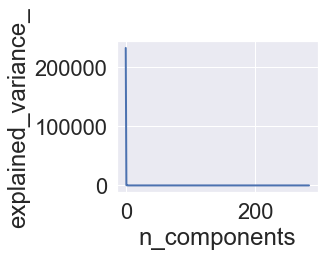

In [56]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

logistic = linear_model.LogisticRegression()

pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

# digits = datasets.load_digits()
X_digits = features
y_digits = targets

###############################################################################
# Plot the PCA spectrum
pca.fit(X_digits)

plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

###############################################################################
# Prediction

n_components = [20, 40, 64]
Cs = np.logspace(-4, 4, 3)

#Parameters of pipelines can be set using ‘__’ separated parameter names:

estimator = GridSearchCV(pipe,
                         dict(pca__n_components=n_components,
                              logistic__C=Cs))
estimator.fit(X, y)

plt.axvline(estimator.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
plt.legend(prop=dict(size=12))
plt.show()

In [ ]:
# *****
test_features = test.iloc[:,0:54]
Test_features = model.transform(test_features)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
Classifiers = [DecisionTreeClassifier(),LogisticRegression(C=0.000000001,solver='liblinear',max_iter=200),RandomForestClassifier(n_estimators=200)]


from sklearn.metrics import accuracy_score
Model = []
Accuracy = []
for clf in Classifiers:
    fit=clf.fit(New_features,label)
    pred=fit.predict(Test_features)
    Model.append(clf.__class__.__name__)
    Accuracy.append(accuracy_score(test['Cover_Type'],pred))
    print('Accuracy of '+clf.__class__.__name__ +' is '+str(accuracy_score(test['Cover_Type'],pred)))


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test['Cover_Type'],pred)


importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature importances")
plt.bar(range(New_features.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(New_features.shape[1]), indices)
plt.xlim([-1, New_features.shape[1]])
plt.show()

In [ ]:
# categorical_features = features[['Origin','Dest','description']]# numeric_features=features[['hour', 'pressure', 'humidity', 'temperature', 'wind_speed', 'Distance']]
# One hot encode
# categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
# features1234 = pd.concat([numeric_features, categorical_features], axis = 1)
# features = features1234 #(278220, 13)
# targets = pd.DataFrame(y)  #278220,)

#TO RUN AND CHECK
#NEW BY Kyle
#setup pipelines for both numeric and categorical data 
# from __future__ import print_function

import pandas as pd
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

# We create the preprocessing pipelines for both numeric and categorical data.
numeric_features = ['hour', 'pressure', 'humidity', 'temperature', 'wind_speed', 'Distance']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['Origin','Dest','description']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(solver='lbfgs'))])

X = features
y = targets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))



In [ ]:
plt.style.use('fivethirtyeight')
figsize(8, 6)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression', 
                                           'Random Forest', 'Gradient Boosted',
                                            'K-Nearest Neighbors'],
                                 'mae': [lr_mae, random_forest_mae, 
                                         gradient_boosted_mae, knn_mae]})

# Horizontal bar chart of test mae
model_comparison.sort_values('mae', ascending = False).plot(x = 'model', y = 'mae', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Mean Absolute Error'); plt.xticks(size = 14)
plt.title('Model Comparison on Test MAE', size = 20);

# Model Optimization 

In [ ]:
# Loss function to be optimized
loss = ['ls', 'lad', 'huber']

# Number of trees used in the boosting process
n_estimators = [100, 500, 900, 1100, 1500]

# Maximum depth of each tree
max_depth = [2, 3, 5, 10, 15]

# Minimum number of samples per leaf
min_samples_leaf = [1, 2, 4, 6, 8]

# Minimum number of samples to split a node
min_samples_split = [2, 4, 6, 10]

# Maximum number of features to consider for making splits
max_features = ['auto', 'sqrt', 'log2', None]

# Define the grid of hyperparameters to search
hyperparameter_grid = {'loss': loss,
                       'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [ ]:
# Create the model to use for hyperparameter tuning
model = GradientBoostingRegressor(random_state = 42)

# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=25, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=42)

In [ ]:
df.head()

In [ ]:
# df.to_csv("./dataframe.csv")

Because running a model took too long, we decided to manually select features

In [ ]:
# #NEW BY Kyle

# param_grid = {
#     'preprocessor__num__imputer__strategy': ['mean', 'median'],
#     'classifier__C': [0.1, 1.0, 10, 100],
# }

# grid_search = GridSearchCV(clf, param_grid, cv=10, iid=False)
# grid_search.fit(X_train, y_train)

# print(("best logistic regression from grid search: %.3f"
#        % grid_search.score(X_test, y_test)))

In [ ]:
Random forest 

In [ ]:
# #all classifiers 

# print(__doc__)

# # Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
# # License: BSD 3 clause

# import matplotlib.pyplot as plt
# import numpy as np

# from sklearn.metrics import accuracy_score
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.gaussian_process import GaussianProcessClassifier
# from sklearn.gaussian_process.kernels import RBF
# from sklearn import datasets

# iris = datasets.load_iris()
# X = iris.data[:, 0:2]  # we only take the first two features for visualization
# y = iris.target

# n_features = X.shape[1]

# C = 10
# kernel = 1.0 * RBF([1.0, 1.0])  # for GPC

# # Create different classifiers.
# classifiers = {
#     'L1 logistic': LogisticRegression(C=C, penalty='l1',
#                                       solver='saga',
#                                       multi_class='multinomial',
#                                       max_iter=10000),
#     'L2 logistic (Multinomial)': LogisticRegression(C=C, penalty='l2',
#                                                     solver='saga',
#                                                     multi_class='multinomial',
#                                                     max_iter=10000),
#     'L2 logistic (OvR)': LogisticRegression(C=C, penalty='l2',
#                                             solver='saga',
#                                             multi_class='ovr',
#                                             max_iter=10000),
#     'Linear SVC': SVC(kernel='linear', C=C, probability=True,
#                       random_state=0),
#     'GPC': GaussianProcessClassifier(kernel)
# }

# n_classifiers = len(classifiers)

# plt.figure(figsize=(3 * 2, n_classifiers * 2))
# plt.subplots_adjust(bottom=.2, top=.95)

# xx = np.linspace(3, 9, 100)
# yy = np.linspace(1, 5, 100).T
# xx, yy = np.meshgrid(xx, yy)
# Xfull = np.c_[xx.ravel(), yy.ravel()]

# for index, (name, classifier) in enumerate(classifiers.items()):
#     classifier.fit(X, y)

#     y_pred = classifier.predict(X)
#     accuracy = accuracy_score(y, y_pred)
#     print("Accuracy (train) for %s: %0.1f%% " % (name, accuracy * 100))

#     # View probabilities:
#     probas = classifier.predict_proba(Xfull)
#     n_classes = np.unique(y_pred).size
#     for k in range(n_classes):
#         plt.subplot(n_classifiers, n_classes, index * n_classes + k + 1)
#         plt.title("Class %d" % k)
#         if k == 0:
#             plt.ylabel(name)
#         imshow_handle = plt.imshow(probas[:, k].reshape((100, 100)),
#                                    extent=(3, 9, 1, 5), origin='lower')
#         plt.xticks(())
#         plt.yticks(())
#         idx = (y_pred == k)
#         if idx.any():
#             plt.scatter(X[idx, 0], X[idx, 1], marker='o', c='w', edgecolor='k')

# ax = plt.axes([0.15, 0.04, 0.7, 0.05])
# plt.title("Probability")
# plt.colorbar(imshow_handle, cax=ax, orientation='horizontal')

# plt.show()


# 2) EDA (Exploratory Data Analysis)

In [ ]:

# temperature is in Kelvin --> assume weather data are in SI Units

From analyzing description, we realized we are just focusing on january.
If there were time, we would explore all features in depth, but there was no time, so we didn't.

## 2.1) Explore weather data

In [ ]:
# correlation heatmaps
# ensure data in each column makes sense
# set up target

## 2.2) Prepare target and X variables

In [ ]:
# y = df.loc[:,'DepDelay']
# X = df.loc[:, df.columns != 'DepDelay']

# 3) Modeling

## 3.1) Feature engineering

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

In [ ]:
# # Scale non-categorized columns
# scaler = preprocessing.StandardScaler()
# scaling_X = X[['pressure','humidity','temperature','wind_direction','wind_speed','Distance','ArrDelay','AirTime']]
# scaler.fit(scaling_X)
# features_scaled = pd.DataFrame(scaler.transform(scaling_X), \
#                                      columns = ['pressure','humidity','temperature','wind_direction','wind_speed',\
#                                                 'Distance','ArrDelay','AirTime'])


In [ ]:
# X[['pressure','humidity','temperature','wind_direction','wind_speed','Distance','ArrDelay','AirTime']] = features_scaled

In [ ]:
# # 
# poly = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
# features_64_train = pd.DataFrame(poly.fit_transform(features_scaled_train), columns=poly.get_feature_names(features_scaled_train.columns))
# features_64_train.head()


#### if had time: Would like to perform PCA for dimensionality reduction

### Try Logistic Regression

In [ ]:

# def classification_model(model, x_train, x_test, y_train, y_test):
#     model_ = model
#     model_.fit(x_train, y_train)
#     y_hat_test = model_.predict(x_test)
#     model_y_score = model_.decision_function(x_test)
# #     model_y_score = model_.predict_proba(x_test)[:, 0]
#     fpr, tpr, thresholds = metrics.roc_curve(y_test, model_y_score)
#     return model_, fpr, tpr, thresholds, y_hat_tes

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
# from sklearn.metrics import roc_curve, auc
# from sklearn.metrics import classification_report

In [ ]:
# # Split the data into train and test sets.
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# #Fit a model
# logreg = LogisticRegression(fit_intercept = False, C = 0.01) 
# model_log = logreg.fit(X_train, y_train)
# print(model_log) #Preview model params

# #Predict
# y_hat_train = logreg.predict(X_train)
# y_hat_test = logreg.predict(X_test)

In [ ]:
# cm_matrix_test = confusion_matrix(y_hat_test, y_test)
# cm_matrix_train = confusion_matrix(y_hat_train, y_train)
# print('Confusion Matrix:\n',cm_matrix_test)

In [ ]:
# from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [ ]:
# accuracy_score(y_test,y_hat_test)

In [ ]:
# accuracy_score(y_train, y_hat_train)